In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('data_all_merged_03_08_23_vfinal.csv')

In [ ]:
data.drop('Unnamed: 0',axis = 1,inplace = True)
data.isna().sum() #checking for nulls

customer_id                          0
months_elapsed                       0
lifetime_spent                       0
per_order_spent                      0
outdoor_equipment_pct             2594
Cargo_pct                         2594
Soft_Cooler_pct                   2594
Bags_pct                          2594
drinkware_pct                     2594
Hard_Cooler_pct                   2594
other_pct                         2594
purchase_times                       0
recency                              0
avg_time_btw_orders                  0
email_received                       0
email_open_rate                 383955
unsubscribed                    383955
months_since_last_email_open    546434
num_distinct_prod_cats               0
lifetime_quantity                    5
per_order_quantity                   5
has_discount                         5
black                            11850
navy                             11850
white                            11850
seafoam                  

In [ ]:
values_fillna = {'black' : 0,'navy': 0,'white':0,'seafoam':0,'stainless':0,'charcoal':0,'nordic_purple':0,'harvest_red':0,'alpine_yellow':0,'other_color':0}
data.fillna(value = values_fillna,inplace = True)

In [ ]:
data.isna().sum() #checking for nulls

customer_id                          0
months_elapsed                       0
lifetime_spent                       0
per_order_spent                      0
outdoor_equipment_pct             2594
Cargo_pct                         2594
Soft_Cooler_pct                   2594
Bags_pct                          2594
drinkware_pct                     2594
Hard_Cooler_pct                   2594
other_pct                         2594
purchase_times                       0
recency                              0
avg_time_btw_orders                  0
email_received                       0
email_open_rate                 383955
unsubscribed                    383955
months_since_last_email_open    546434
num_distinct_prod_cats               0
lifetime_quantity                    5
per_order_quantity                   5
has_discount                         5
black                                0
navy                                 0
white                                0
seafoam                  

In [ ]:
data.drop(['email_open_rate','unsubscribed','months_since_last_email_open'],axis = 1,inplace = True)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data_sample = data.sample(n=1000000, random_state=123) # we have 1 M rows

In [ ]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 902579 to 2013582
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1000000 non-null  object 
 1   months_elapsed          1000000 non-null  float64
 2   lifetime_spent          1000000 non-null  float64
 3   per_order_spent         1000000 non-null  float64
 4   outdoor_equipment_pct   1000000 non-null  float64
 5   Cargo_pct               1000000 non-null  float64
 6   Soft_Cooler_pct         1000000 non-null  float64
 7   Bags_pct                1000000 non-null  float64
 8   drinkware_pct           1000000 non-null  float64
 9   Hard_Cooler_pct         1000000 non-null  float64
 10  other_pct               1000000 non-null  float64
 11  purchase_times          1000000 non-null  int64  
 12  recency                 1000000 non-null  float64
 13  avg_time_btw_orders     1000000 non-null  float64
 1

In [ ]:
data_sample.columns 

Index(['customer_id', 'months_elapsed', 'lifetime_spent', 'per_order_spent',
       'outdoor_equipment_pct', 'Cargo_pct', 'Soft_Cooler_pct', 'Bags_pct',
       'drinkware_pct', 'Hard_Cooler_pct', 'other_pct', 'purchase_times',
       'recency', 'avg_time_btw_orders', 'email_received',
       'num_distinct_prod_cats', 'lifetime_quantity', 'per_order_quantity',
       'has_discount', 'black', 'navy', 'white', 'seafoam', 'stainless',
       'charcoal', 'nordic_purple', 'harvest_red', 'alpine_yellow',
       'other_color'],
      dtype='object')

In [ ]:
data_sample

,customer_id,months_elapsed,lifetime_spent,per_order_spent,outdoor_equipment_pct,Cargo_pct,Soft_Cooler_pct,Bags_pct,drinkware_pct,Hard_Cooler_pct,...,black,navy,white,seafoam,stainless,charcoal,nordic_purple,harvest_red,alpine_yellow,other_color
902579,f61aa565-68e9-4e30-9875-105e4586cfd4,51.466667,1643917.0,260.732276,0.000000,0.769231,0.0,0.000000,0.000000,0.153846,...,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
583437,53ca3ba1-cdf5-492b-9dc6-b11f21865a57,22.833333,136257.0,45.328343,0.000000,0.000000,0.0,0.000000,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1752731,2bbe02d0-f4f6-4b50-aa22-d88b330565ca,57.433333,190.0,63.333333,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1696483,d34dc146-6f22-409f-92d3-b4731c3f797f,15.500000,211947.0,99.975000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
850586,2b6f9e56-4c89-4517-aeef-504e447c3f6f,30.666667,1565.0,142.272727,0.000000,0.000000,0.0,0.000000,0.846154,0.000000,...,3.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456005,1490e8c9-c963-403e-89b0-0158a01f4f11,25.466667,73134.0,114.990566,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1579898,60090e71-e227-4db8-be20-de0c7c62f94c,15.833333,400.0,200.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447548,199b7fed-2f96-4ba7-8da7-4e75f3286b20,68.900000,21438.0,43.309091,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
1902475,0aeb1b00-b836-43d3-afc6-ecc981349f65,54.266667,90.0,30.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


### Scaling columns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cols_to_standardize = ['months_elapsed', 'lifetime_spent', 'per_order_spent',
       'outdoor_equipment_pct', 'Cargo_pct', 'Soft_Cooler_pct', 'Bags_pct',
       'drinkware_pct', 'Hard_Cooler_pct', 'other_pct', 'purchase_times',
       'recency', 'avg_time_btw_orders', 'email_received',
       'num_distinct_prod_cats', 'lifetime_quantity', 'per_order_quantity',
       'has_discount', 'black', 'navy', 'white', 'seafoam', 'stainless',
       'charcoal', 'nordic_purple', 'harvest_red', 'alpine_yellow',
       'other_color']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the specified columns using the StandardScaler object
data_sample_std = data_sample.copy()

In [ ]:
data_sample_std[cols_to_standardize]=scaler.fit_transform(data_sample[cols_to_standardize])

In [ ]:
X = data_sample_std[cols_to_standardize]
X

,months_elapsed,lifetime_spent,per_order_spent,outdoor_equipment_pct,Cargo_pct,Soft_Cooler_pct,Bags_pct,drinkware_pct,Hard_Cooler_pct,other_pct,...,black,navy,white,seafoam,stainless,charcoal,nordic_purple,harvest_red,alpine_yellow,other_color
902579,0.538126,0.182181,0.477831,-0.197998,12.986630,-0.310977,-0.220615,-2.225689,0.640768,-0.662294,...,0.197991,-0.110761,0.015385,0.086864,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.059402
583437,-0.732191,-0.058662,-0.319372,-0.197998,-0.128503,-0.310977,-0.220615,0.090568,-0.341094,0.443534,...,-0.099030,-0.110761,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.087122
1752731,0.802837,-0.080398,-0.252736,-0.197998,-0.128503,-0.310977,-0.220615,1.248697,-0.341094,-0.994042,...,-0.099030,-0.110761,-0.091843,0.086864,0.007151,0.197467,-0.135953,-0.068508,-0.065929,-0.253436
1696483,-1.057534,-0.046571,-0.117127,-0.197998,-0.128503,-0.310977,-0.220615,-0.488496,-0.341094,1.162321,...,0.123736,-0.044049,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.142560
850586,-0.384665,-0.080178,0.039416,-0.197998,-0.128503,-0.310977,-0.220615,0.714176,-0.341094,-0.330546,...,0.123736,-0.044049,-0.091843,-0.136080,0.125740,-0.128557,-0.135953,-0.068508,-0.065929,-0.087122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456005,-0.615363,-0.068746,-0.061554,-0.197998,-0.128503,-0.310977,-0.220615,1.248697,-0.341094,-0.994042,...,0.049480,-0.110761,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.253436
1579898,-1.042745,-0.080365,0.253063,-0.197998,-0.128503,-0.310977,-0.220615,-2.225689,6.041009,-0.994042,...,-0.099030,0.022662,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.253436
447548,1.311555,-0.077004,-0.326845,-0.197998,-0.128503,-0.310977,-0.220615,1.248697,-0.341094,-0.994042,...,-0.099030,-0.110761,-0.091843,0.086864,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.170279
1902475,0.662348,-0.080414,-0.376102,-0.197998,-0.128503,-0.310977,-0.220615,1.248697,-0.341094,-0.994042,...,-0.099030,-0.110761,0.015385,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.170279


### Applying weights to features

In [ ]:
X_weighted = X

In [ ]:
weights = {'months_elapsed':5, 'lifetime_spent':5, 'per_order_spent':5,
       'outdoor_equipment_pct':2, 'Cargo_pct':2, 'Soft_Cooler_pct':2, 'Bags_pct':2,
       'drinkware_pct':2, 'Hard_Cooler_pct':2, 'other_pct':2, 'purchase_times':5,
       'recency':17.5, 'avg_time_btw_orders':17.5, 'email_received':3,
       'num_distinct_prod_cats':5, 'lifetime_quantity':5, 'per_order_quantity':5,
       'has_discount':3, 'black':1, 'navy':1, 'white':1, 'seafoam':1, 'stainless':1,
       'charcoal':1, 'nordic_purple':1, 'harvest_red':1, 'alpine_yellow':1,
       'other_color':1}

X_weighted = X.mul(weights, axis='columns')
X_weighted

,months_elapsed,lifetime_spent,per_order_spent,outdoor_equipment_pct,Cargo_pct,Soft_Cooler_pct,Bags_pct,drinkware_pct,Hard_Cooler_pct,other_pct,...,black,navy,white,seafoam,stainless,charcoal,nordic_purple,harvest_red,alpine_yellow,other_color
902579,2.690630,0.910906,2.389156,-0.395996,25.973260,-0.621953,-0.441230,-4.451379,1.281536,-1.324588,...,0.197991,-0.110761,0.015385,0.086864,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.059402
583437,-3.660953,-0.293310,-1.596860,-0.395996,-0.257007,-0.621953,-0.441230,0.181136,-0.682188,0.887067,...,-0.099030,-0.110761,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.087122
1752731,4.014185,-0.401991,-1.263681,-0.395996,-0.257007,-0.621953,-0.441230,2.497394,-0.682188,-1.988084,...,-0.099030,-0.110761,-0.091843,0.086864,0.007151,0.197467,-0.135953,-0.068508,-0.065929,-0.253436
1696483,-5.287668,-0.232854,-0.585633,-0.395996,-0.257007,-0.621953,-0.441230,-0.976992,-0.682188,2.324643,...,0.123736,-0.044049,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.142560
850586,-1.923326,-0.400892,0.197080,-0.395996,-0.257007,-0.621953,-0.441230,1.428352,-0.682188,-0.661091,...,0.123736,-0.044049,-0.091843,-0.136080,0.125740,-0.128557,-0.135953,-0.068508,-0.065929,-0.087122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456005,-3.076814,-0.343728,-0.307772,-0.395996,-0.257007,-0.621953,-0.441230,2.497394,-0.682188,-1.988084,...,0.049480,-0.110761,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.253436
1579898,-5.213727,-0.401823,1.265314,-0.395996,-0.257007,-0.621953,-0.441230,-4.451379,12.082018,-1.988084,...,-0.099030,0.022662,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.253436
447548,6.557776,-0.385019,-1.634226,-0.395996,-0.257007,-0.621953,-0.441230,2.497394,-0.682188,-1.988084,...,-0.099030,-0.110761,-0.091843,0.086864,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.170279
1902475,3.311740,-0.402071,-1.880509,-0.395996,-0.257007,-0.621953,-0.441230,2.497394,-0.682188,-1.988084,...,-0.099030,-0.110761,0.015385,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.170279


In [ ]:
weights = {'months_elapsed':5, 'lifetime_spent':5, 'per_order_spent':5,
       'outdoor_equipment_pct':2, 'Cargo_pct':2, 'Soft_Cooler_pct':2, 'Bags_pct':2,
       'drinkware_pct':2, 'Hard_Cooler_pct':2, 'other_pct':2, 'purchase_times':5,
       'recency':17.5, 'avg_time_btw_orders':17.5, 'email_received':3,
       'num_distinct_prod_cats':5, 'lifetime_quantity':5, 'per_order_quantity':5,
       'has_discount':3, 'black':1, 'navy':1, 'white':1, 'seafoam':1, 'stainless':1,
       'charcoal':1, 'nordic_purple':1, 'harvest_red':1, 'alpine_yellow':1,
       'other_color':1}

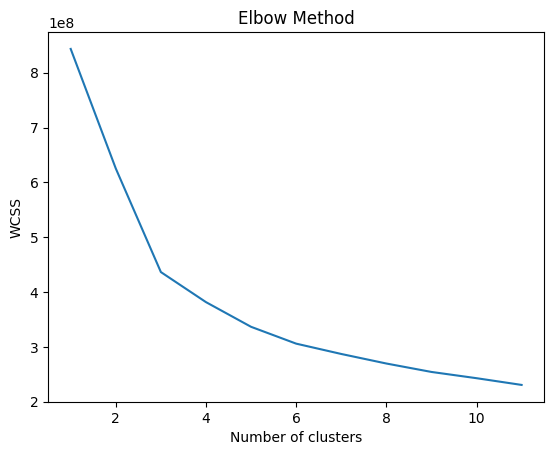

In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_weighted)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
n_clusters=6

In [ ]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_weighted)
# data_sample['cluster'] = y_kmeans

In [ ]:
data_sample['cluster'] = y_kmeans

In [ ]:
data_sample

,customer_id,months_elapsed,lifetime_spent,per_order_spent,outdoor_equipment_pct,Cargo_pct,Soft_Cooler_pct,Bags_pct,drinkware_pct,Hard_Cooler_pct,...,navy,white,seafoam,stainless,charcoal,nordic_purple,harvest_red,alpine_yellow,other_color,cluster
902579,f61aa565-68e9-4e30-9875-105e4586cfd4,51.466667,1643917.0,260.732276,0.000000,0.769231,0.0,0.000000,0.000000,0.153846,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,1
583437,53ca3ba1-cdf5-492b-9dc6-b11f21865a57,22.833333,136257.0,45.328343,0.000000,0.000000,0.0,0.000000,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2
1752731,2bbe02d0-f4f6-4b50-aa22-d88b330565ca,57.433333,190.0,63.333333,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4
1696483,d34dc146-6f22-409f-92d3-b4731c3f797f,15.500000,211947.0,99.975000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2
850586,2b6f9e56-4c89-4517-aeef-504e447c3f6f,30.666667,1565.0,142.272727,0.000000,0.000000,0.0,0.000000,0.846154,0.000000,...,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456005,1490e8c9-c963-403e-89b0-0158a01f4f11,25.466667,73134.0,114.990566,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1579898,60090e71-e227-4db8-be20-de0c7c62f94c,15.833333,400.0,200.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
447548,199b7fed-2f96-4ba7-8da7-4e75f3286b20,68.900000,21438.0,43.309091,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,4
1902475,0aeb1b00-b836-43d3-afc6-ecc981349f65,54.266667,90.0,30.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4


In [ ]:
data_sample.groupby('cluster').agg(['mean','std']).round(3)[['recency','avg_time_btw_orders']]

recency         avg_time_btw_orders        
           mean     std                mean     std
cluster                                            
0        29.828   7.280               4.912   4.536
1        14.547  10.343              22.979   6.355
2         8.551   5.303               5.522   4.064
3        15.306  14.611               5.118   6.285
4        64.359  12.815               5.720   6.888
5        15.616  11.961              52.838  12.710

In [ ]:
data_sample['cluster'].value_counts()

2    450385
0    249330
1    157941
4     96032
5     38926
3      7386
Name: cluster, dtype: int64

In [ ]:
data_sample.groupby('cluster').agg(['mean','std']).round(3)

months_elapsed         lifetime_spent               per_order_spent  \
                  mean     std           mean           std            mean   
cluster                                                                       
0               39.843  13.575   2.771447e+05  1.169482e+06         106.162   
1               49.604  18.602   2.309956e+05  8.411095e+05         107.442   
2               25.802  17.125   5.559429e+05  1.963972e+06         123.912   
3               32.288  20.185   1.805820e+07  6.849488e+07        2043.040   
4               72.374  14.296   9.746462e+04  4.315303e+05         132.852   
5               70.873  15.737   1.224436e+05  4.644864e+05         116.312   

                  outdoor_equipment_pct        Cargo_pct         ... charcoal  \
              std                  mean    std      mean    std  ...     mean   
cluster                                                          ...            
0         136.607                 0.015  0.080     0.007  0.059  ...    0.207   
1         126.500                 0.015  0.075     0.008  0.059  ...    0.210   
2         144.877                 0.016  0.071     0.007  0.054  ...    0.508   
3        1792.541                 0.003  0.030     0.002  0.034  ...    8.957   
4         216.416                 0.006  0.055     0.009  0.074  ...    0.087   
5         149.688                 0.013  0.076     0.009  0.070  ...    0.158   

                nordic_purple         harvest_red         alpine_yellow  \
            std          mean     std        mean     std          mean   
cluster                                                                   
0         1.194         0.000   0.000       0.018   0.219         0.000   
1         0.952         0.109   0.503       0.084   0.655         0.077   
2         2.110         0.324   1.172       0.333   1.536         0.281   
3        28.936         1.974  12.023       6.079  33.710         3.754   
4         1.109         0.000   0.000       0.000   0.000         0.000   
5         0.893         0.091   0.387       0.053   0.642         0.061   

                other_color           
            std        mean      std  
cluster                               
0         0.000       6.119   10.391  
1         0.486       4.617    6.903  
2         1.409      10.474   18.318  
3        27.301     238.227  310.164  
4         0.000       3.148    7.699  
5         0.382       2.800    4.615  

[6 rows x 56 columns]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('data_all_merged_03_08_23_vfinal.csv')

In [ ]:
data.drop('Unnamed: 0',axis = 1,inplace = True)
data.isna().sum() #checking for nulls

customer_id                          0
months_elapsed                       0
lifetime_spent                       0
per_order_spent                      0
outdoor_equipment_pct             2594
Cargo_pct                         2594
Soft_Cooler_pct                   2594
Bags_pct                          2594
drinkware_pct                     2594
Hard_Cooler_pct                   2594
other_pct                         2594
purchase_times                       0
recency                              0
avg_time_btw_orders                  0
email_received                       0
email_open_rate                 383955
unsubscribed                    383955
months_since_last_email_open    546434
num_distinct_prod_cats               0
lifetime_quantity                    5
per_order_quantity                   5
has_discount                         5
black                            11850
navy                             11850
white                            11850
seafoam                  

In [ ]:
values_fillna = {'black' : 0,'navy': 0,'white':0,'seafoam':0,'stainless':0,'charcoal':0,'nordic_purple':0,'harvest_red':0,'alpine_yellow':0,'other_color':0}
data.fillna(value = values_fillna,inplace = True)

In [ ]:
data.isna().sum() #checking for nulls

customer_id                          0
months_elapsed                       0
lifetime_spent                       0
per_order_spent                      0
outdoor_equipment_pct             2594
Cargo_pct                         2594
Soft_Cooler_pct                   2594
Bags_pct                          2594
drinkware_pct                     2594
Hard_Cooler_pct                   2594
other_pct                         2594
purchase_times                       0
recency                              0
avg_time_btw_orders                  0
email_received                       0
email_open_rate                 383955
unsubscribed                    383955
months_since_last_email_open    546434
num_distinct_prod_cats               0
lifetime_quantity                    5
per_order_quantity                   5
has_discount                         5
black                                0
navy                                 0
white                                0
seafoam                  

In [ ]:
data.drop(['email_open_rate','unsubscribed','months_since_last_email_open'],axis = 1,inplace = True)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data_sample = data.sample(n=1000000, random_state=123) # we have 1 M rows

In [ ]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 902579 to 2013582
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1000000 non-null  object 
 1   months_elapsed          1000000 non-null  float64
 2   lifetime_spent          1000000 non-null  float64
 3   per_order_spent         1000000 non-null  float64
 4   outdoor_equipment_pct   1000000 non-null  float64
 5   Cargo_pct               1000000 non-null  float64
 6   Soft_Cooler_pct         1000000 non-null  float64
 7   Bags_pct                1000000 non-null  float64
 8   drinkware_pct           1000000 non-null  float64
 9   Hard_Cooler_pct         1000000 non-null  float64
 10  other_pct               1000000 non-null  float64
 11  purchase_times          1000000 non-null  int64  
 12  recency                 1000000 non-null  float64
 13  avg_time_btw_orders     1000000 non-null  float64
 1

In [ ]:
data_sample.columns 

Index(['customer_id', 'months_elapsed', 'lifetime_spent', 'per_order_spent',
       'outdoor_equipment_pct', 'Cargo_pct', 'Soft_Cooler_pct', 'Bags_pct',
       'drinkware_pct', 'Hard_Cooler_pct', 'other_pct', 'purchase_times',
       'recency', 'avg_time_btw_orders', 'email_received',
       'num_distinct_prod_cats', 'lifetime_quantity', 'per_order_quantity',
       'has_discount', 'black', 'navy', 'white', 'seafoam', 'stainless',
       'charcoal', 'nordic_purple', 'harvest_red', 'alpine_yellow',
       'other_color'],
      dtype='object')

In [ ]:
data_sample

,customer_id,months_elapsed,lifetime_spent,per_order_spent,outdoor_equipment_pct,Cargo_pct,Soft_Cooler_pct,Bags_pct,drinkware_pct,Hard_Cooler_pct,...,black,navy,white,seafoam,stainless,charcoal,nordic_purple,harvest_red,alpine_yellow,other_color
902579,f61aa565-68e9-4e30-9875-105e4586cfd4,51.466667,1643917.0,260.732276,0.000000,0.769231,0.0,0.000000,0.000000,0.153846,...,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
583437,53ca3ba1-cdf5-492b-9dc6-b11f21865a57,22.833333,136257.0,45.328343,0.000000,0.000000,0.0,0.000000,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1752731,2bbe02d0-f4f6-4b50-aa22-d88b330565ca,57.433333,190.0,63.333333,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1696483,d34dc146-6f22-409f-92d3-b4731c3f797f,15.500000,211947.0,99.975000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
850586,2b6f9e56-4c89-4517-aeef-504e447c3f6f,30.666667,1565.0,142.272727,0.000000,0.000000,0.0,0.000000,0.846154,0.000000,...,3.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456005,1490e8c9-c963-403e-89b0-0158a01f4f11,25.466667,73134.0,114.990566,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1579898,60090e71-e227-4db8-be20-de0c7c62f94c,15.833333,400.0,200.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447548,199b7fed-2f96-4ba7-8da7-4e75f3286b20,68.900000,21438.0,43.309091,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
1902475,0aeb1b00-b836-43d3-afc6-ecc981349f65,54.266667,90.0,30.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


### Scaling columns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cols_to_standardize = ['months_elapsed', 'lifetime_spent', 'per_order_spent',
       'outdoor_equipment_pct', 'Cargo_pct', 'Soft_Cooler_pct', 'Bags_pct',
       'drinkware_pct', 'Hard_Cooler_pct', 'other_pct', 'purchase_times',
       'recency', 'avg_time_btw_orders', 'email_received',
       'num_distinct_prod_cats', 'lifetime_quantity', 'per_order_quantity',
       'has_discount', 'black', 'navy', 'white', 'seafoam', 'stainless',
       'charcoal', 'nordic_purple', 'harvest_red', 'alpine_yellow',
       'other_color']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the specified columns using the StandardScaler object
data_sample_std = data_sample.copy()

In [ ]:
data_sample_std[cols_to_standardize]=scaler.fit_transform(data_sample[cols_to_standardize])

In [ ]:
X = data_sample_std[cols_to_standardize]
X

,months_elapsed,lifetime_spent,per_order_spent,outdoor_equipment_pct,Cargo_pct,Soft_Cooler_pct,Bags_pct,drinkware_pct,Hard_Cooler_pct,other_pct,...,black,navy,white,seafoam,stainless,charcoal,nordic_purple,harvest_red,alpine_yellow,other_color
902579,0.538126,0.182181,0.477831,-0.197998,12.986630,-0.310977,-0.220615,-2.225689,0.640768,-0.662294,...,0.197991,-0.110761,0.015385,0.086864,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.059402
583437,-0.732191,-0.058662,-0.319372,-0.197998,-0.128503,-0.310977,-0.220615,0.090568,-0.341094,0.443534,...,-0.099030,-0.110761,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.087122
1752731,0.802837,-0.080398,-0.252736,-0.197998,-0.128503,-0.310977,-0.220615,1.248697,-0.341094,-0.994042,...,-0.099030,-0.110761,-0.091843,0.086864,0.007151,0.197467,-0.135953,-0.068508,-0.065929,-0.253436
1696483,-1.057534,-0.046571,-0.117127,-0.197998,-0.128503,-0.310977,-0.220615,-0.488496,-0.341094,1.162321,...,0.123736,-0.044049,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.142560
850586,-0.384665,-0.080178,0.039416,-0.197998,-0.128503,-0.310977,-0.220615,0.714176,-0.341094,-0.330546,...,0.123736,-0.044049,-0.091843,-0.136080,0.125740,-0.128557,-0.135953,-0.068508,-0.065929,-0.087122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456005,-0.615363,-0.068746,-0.061554,-0.197998,-0.128503,-0.310977,-0.220615,1.248697,-0.341094,-0.994042,...,0.049480,-0.110761,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.253436
1579898,-1.042745,-0.080365,0.253063,-0.197998,-0.128503,-0.310977,-0.220615,-2.225689,6.041009,-0.994042,...,-0.099030,0.022662,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.253436
447548,1.311555,-0.077004,-0.326845,-0.197998,-0.128503,-0.310977,-0.220615,1.248697,-0.341094,-0.994042,...,-0.099030,-0.110761,-0.091843,0.086864,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.170279
1902475,0.662348,-0.080414,-0.376102,-0.197998,-0.128503,-0.310977,-0.220615,1.248697,-0.341094,-0.994042,...,-0.099030,-0.110761,0.015385,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.170279


### Applying weights to features

In [ ]:
X_weighted = X

In [ ]:
weights = {'months_elapsed':5, 'lifetime_spent':5, 'per_order_spent':5,
       'outdoor_equipment_pct':2, 'Cargo_pct':2, 'Soft_Cooler_pct':2, 'Bags_pct':2,
       'drinkware_pct':2, 'Hard_Cooler_pct':2, 'other_pct':2, 'purchase_times':5,
       'recency':17.5, 'avg_time_btw_orders':17.5, 'email_received':3,
       'num_distinct_prod_cats':5, 'lifetime_quantity':5, 'per_order_quantity':5,
       'has_discount':3, 'black':1, 'navy':1, 'white':1, 'seafoam':1, 'stainless':1,
       'charcoal':1, 'nordic_purple':1, 'harvest_red':1, 'alpine_yellow':1,
       'other_color':1}

X_weighted = X.mul(weights, axis='columns')
X_weighted

,months_elapsed,lifetime_spent,per_order_spent,outdoor_equipment_pct,Cargo_pct,Soft_Cooler_pct,Bags_pct,drinkware_pct,Hard_Cooler_pct,other_pct,...,black,navy,white,seafoam,stainless,charcoal,nordic_purple,harvest_red,alpine_yellow,other_color
902579,2.690630,0.910906,2.389156,-0.395996,25.973260,-0.621953,-0.441230,-4.451379,1.281536,-1.324588,...,0.197991,-0.110761,0.015385,0.086864,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.059402
583437,-3.660953,-0.293310,-1.596860,-0.395996,-0.257007,-0.621953,-0.441230,0.181136,-0.682188,0.887067,...,-0.099030,-0.110761,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.087122
1752731,4.014185,-0.401991,-1.263681,-0.395996,-0.257007,-0.621953,-0.441230,2.497394,-0.682188,-1.988084,...,-0.099030,-0.110761,-0.091843,0.086864,0.007151,0.197467,-0.135953,-0.068508,-0.065929,-0.253436
1696483,-5.287668,-0.232854,-0.585633,-0.395996,-0.257007,-0.621953,-0.441230,-0.976992,-0.682188,2.324643,...,0.123736,-0.044049,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.142560
850586,-1.923326,-0.400892,0.197080,-0.395996,-0.257007,-0.621953,-0.441230,1.428352,-0.682188,-0.661091,...,0.123736,-0.044049,-0.091843,-0.136080,0.125740,-0.128557,-0.135953,-0.068508,-0.065929,-0.087122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456005,-3.076814,-0.343728,-0.307772,-0.395996,-0.257007,-0.621953,-0.441230,2.497394,-0.682188,-1.988084,...,0.049480,-0.110761,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.253436
1579898,-5.213727,-0.401823,1.265314,-0.395996,-0.257007,-0.621953,-0.441230,-4.451379,12.082018,-1.988084,...,-0.099030,0.022662,-0.091843,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.253436
447548,6.557776,-0.385019,-1.634226,-0.395996,-0.257007,-0.621953,-0.441230,2.497394,-0.682188,-1.988084,...,-0.099030,-0.110761,-0.091843,0.086864,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.170279
1902475,3.311740,-0.402071,-1.880509,-0.395996,-0.257007,-0.621953,-0.441230,2.497394,-0.682188,-1.988084,...,-0.099030,-0.110761,0.015385,-0.136080,-0.052144,-0.128557,-0.135953,-0.068508,-0.065929,-0.170279


In [ ]:
weights = {'months_elapsed':5, 'lifetime_spent':5, 'per_order_spent':5,
       'outdoor_equipment_pct':2, 'Cargo_pct':2, 'Soft_Cooler_pct':2, 'Bags_pct':2,
       'drinkware_pct':2, 'Hard_Cooler_pct':2, 'other_pct':2, 'purchase_times':5,
       'recency':17.5, 'avg_time_btw_orders':17.5, 'email_received':3,
       'num_distinct_prod_cats':5, 'lifetime_quantity':5, 'per_order_quantity':5,
       'has_discount':3, 'black':1, 'navy':1, 'white':1, 'seafoam':1, 'stainless':1,
       'charcoal':1, 'nordic_purple':1, 'harvest_red':1, 'alpine_yellow':1,
       'other_color':1}

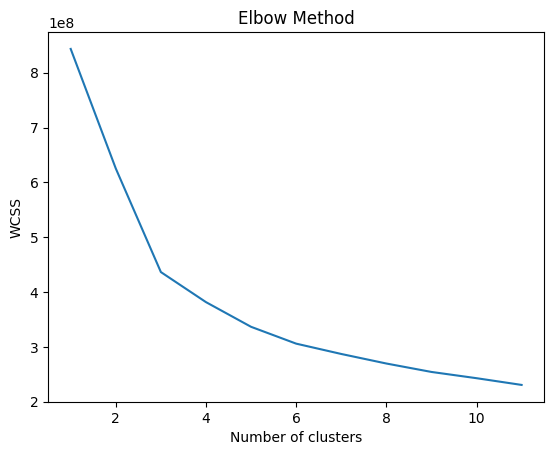

In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_weighted)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
n_clusters=6

In [ ]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_weighted)
# data_sample['cluster'] = y_kmeans

In [ ]:
data_sample['cluster'] = y_kmeans

In [ ]:
data_sample

,customer_id,months_elapsed,lifetime_spent,per_order_spent,outdoor_equipment_pct,Cargo_pct,Soft_Cooler_pct,Bags_pct,drinkware_pct,Hard_Cooler_pct,...,navy,white,seafoam,stainless,charcoal,nordic_purple,harvest_red,alpine_yellow,other_color,cluster
902579,f61aa565-68e9-4e30-9875-105e4586cfd4,51.466667,1643917.0,260.732276,0.000000,0.769231,0.0,0.000000,0.000000,0.153846,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,1
583437,53ca3ba1-cdf5-492b-9dc6-b11f21865a57,22.833333,136257.0,45.328343,0.000000,0.000000,0.0,0.000000,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2
1752731,2bbe02d0-f4f6-4b50-aa22-d88b330565ca,57.433333,190.0,63.333333,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4
1696483,d34dc146-6f22-409f-92d3-b4731c3f797f,15.500000,211947.0,99.975000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2
850586,2b6f9e56-4c89-4517-aeef-504e447c3f6f,30.666667,1565.0,142.272727,0.000000,0.000000,0.0,0.000000,0.846154,0.000000,...,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456005,1490e8c9-c963-403e-89b0-0158a01f4f11,25.466667,73134.0,114.990566,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1579898,60090e71-e227-4db8-be20-de0c7c62f94c,15.833333,400.0,200.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
447548,199b7fed-2f96-4ba7-8da7-4e75f3286b20,68.900000,21438.0,43.309091,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,4
1902475,0aeb1b00-b836-43d3-afc6-ecc981349f65,54.266667,90.0,30.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4


In [ ]:
data_sample.groupby('cluster').agg(['mean','std']).round(3)[['recency','avg_time_btw_orders']]

recency         avg_time_btw_orders        
           mean     std                mean     std
cluster                                            
0        29.828   7.280               4.912   4.536
1        14.547  10.343              22.979   6.355
2         8.551   5.303               5.522   4.064
3        15.306  14.611               5.118   6.285
4        64.359  12.815               5.720   6.888
5        15.616  11.961              52.838  12.710

In [ ]:
data_sample['cluster'].value_counts()

2    450385
0    249330
1    157941
4     96032
5     38926
3      7386
Name: cluster, dtype: int64

In [ ]:
data_sample.groupby('cluster').agg(['mean','std']).round(3)

months_elapsed         lifetime_spent               per_order_spent  \
                  mean     std           mean           std            mean   
cluster                                                                       
0               39.843  13.575   2.771447e+05  1.169482e+06         106.162   
1               49.604  18.602   2.309956e+05  8.411095e+05         107.442   
2               25.802  17.125   5.559429e+05  1.963972e+06         123.912   
3               32.288  20.185   1.805820e+07  6.849488e+07        2043.040   
4               72.374  14.296   9.746462e+04  4.315303e+05         132.852   
5               70.873  15.737   1.224436e+05  4.644864e+05         116.312   

                  outdoor_equipment_pct        Cargo_pct         ... charcoal  \
              std                  mean    std      mean    std  ...     mean   
cluster                                                          ...            
0         136.607                 0.015  0.080     0.007  0.059  ...    0.207   
1         126.500                 0.015  0.075     0.008  0.059  ...    0.210   
2         144.877                 0.016  0.071     0.007  0.054  ...    0.508   
3        1792.541                 0.003  0.030     0.002  0.034  ...    8.957   
4         216.416                 0.006  0.055     0.009  0.074  ...    0.087   
5         149.688                 0.013  0.076     0.009  0.070  ...    0.158   

                nordic_purple         harvest_red         alpine_yellow  \
            std          mean     std        mean     std          mean   
cluster                                                                   
0         1.194         0.000   0.000       0.018   0.219         0.000   
1         0.952         0.109   0.503       0.084   0.655         0.077   
2         2.110         0.324   1.172       0.333   1.536         0.281   
3        28.936         1.974  12.023       6.079  33.710         3.754   
4         1.109         0.000   0.000       0.000   0.000         0.000   
5         0.893         0.091   0.387       0.053   0.642         0.061   

                other_color           
            std        mean      std  
cluster                               
0         0.000       6.119   10.391  
1         0.486       4.617    6.903  
2         1.409      10.474   18.318  
3        27.301     238.227  310.164  
4         0.000       3.148    7.699  
5         0.382       2.800    4.615  

[6 rows x 56 columns]